The purpose of this code is to quantify the nuclei, the size and number of synuclein inclusions, and the lysosomal surface area in the lysotracker experiments.

Import Libraries

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import gaussian, threshold_otsu
from skimage.morphology import remove_small_objects, binary_dilation, disk, binary_closing
from skimage.measure import label, regionprops
from skimage import exposure
import czifile
from skimage.filters import try_all_threshold
from skimage.filters import threshold_multiotsu
import skimage
import numpy as np
import czifile
from czifile import CziFile
import matplotlib.pyplot as plt
from skimage import filters, morphology, segmentation
import numpy as np
from skimage.measure import regionprops
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.measure import label, regionprops
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage.filters import try_all_threshold
import czifile as czi
import pandas as pd
from skimage.filters import gaussian
from skimage.filters import threshold_otsu
from skimage import exposure
from skimage import morphology
from skimage.measure import label
from skimage.morphology import remove_small_objects
from skimage import color, filters, feature, transform
from skimage.morphology import binary_dilation, disk, binary_erosion
from skimage import color, filters, feature, transform, draw
from os import listdir
from os.path import isfile, join
from cellpose import io, models, plot
from skimage import io, filters, feature, measure, color
from IPython.display import clear_output
from scipy.ndimage import binary_fill_holes
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy.ndimage import distance_transform_edt
model = models.Cellpose(model_type='cyto')

c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\cellpose\resnet_torch.py:275: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, 

In [18]:
from skimage import io
from matplotlib import pyplot as plt
def show_image(image):
    io.imshow(image)
    plt.show()

Define Sub Functions

In [19]:
# def extract_image_paths(folder):
#     """Extract all image file paths from the specified folder."""
#     return [os.path.join(folder, f) for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

# def read_czi_image(image_path, dapi_channel_idx=2, green_channel_idx=1, red_channel_idx=0):
#     """Load and extract dapi, green, and red channel data from a CZI file."""
#     czi_file = czifile.CziFile(image_path)
#     czi_data = czi_file.asarray()
#     dapi_channel_data = np.squeeze(czi_data[:, :, dapi_channel_idx, :, :, :])
    
#     green_channel_data = np.squeeze(czi_data[:, :, green_channel_idx, :, :, :])
#     red_channel_data = np.squeeze(czi_data[:, :, red_channel_idx, :, :, :])
    
#     return dapi_channel_data, green_channel_data, red_channel_data


# def otsu_thresholding(channel):
#     """Apply Otsu's thresholding and morphological closing to the channel."""
#     threshold_value = threshold_otsu(channel)
#     binary_image = channel > threshold_value
#     # show_image(binary_image)
#     closed_image = binary_closing(binary_image, disk(3))
#     labeled_image = label(closed_image)
#     return closed_image, labeled_image

def calculate_surface_area(labeled_image, channel=None):
    """Calculate the total surface area for labeled regions."""
    props = regionprops(labeled_image, channel)
    return sum(prop.area for prop in props)

# def preprocess_dapi_channel(dapi_channel):
#     """Preprocess the DAPI channel for nuclei quantification."""
#     blurred_dapi = gaussian(dapi_channel, sigma=2)
#     threshold_value = threshold_otsu(blurred_dapi)
#     binary_image = blurred_dapi > threshold_value
#     # show_image(binary_image)
#     cleaned_image = remove_small_objects(binary_image, min_size=400)
#     merged_image = binary_dilation(cleaned_image, footprint=disk(5))
#     labeled_image = label(merged_image)
#     return labeled_image

# def count_nuclei(labeled_image):
#     """Count the number of nuclei in the labeled image."""
#     return len(np.unique(labeled_image)) - 1

# def preprocess_green_channel(green_channel):
#     """Preprocess the green channel for inclusion quantification."""
#     # TODO: adjust_gamma maybe? 
#     confocal_img = exposure.adjust_sigmoid(green_channel, cutoff=0.5)
#     # confocal_img = green_channel
    
#     confocal_img = (confocal_img - confocal_img.min()) / (confocal_img.max() - confocal_img.min())
   
#     # for cutoff in np.arange(0, 1.1, 0.1):
#     #     test_confocal_img = exposure.adjust_sigmoid(green_channel, cutoff=cutoff)
#     #     test_confocal_img = (test_confocal_img - test_confocal_img.min()) / (test_confocal_img.max() - test_confocal_img.min())
#     #     print("cutoff:",cutoff)
#     #     show_image(test_confocal_img)
#     # return confocal_img

#     show_image(confocal_img)
#     return confocal_img

# def threshold_inclusions(confocal_img):
#     """Threshold the preprocessed green channel to segment inclusions."""
#     thresholds = threshold_multiotsu(confocal_img)
#     print(thresholds)
#     # threshold = 0.15 
#     binary_image = confocal_img > thresholds[1]
#     show_image(binary_image)
#     labeled_image = label(binary_image)
#     return binary_image, labeled_image

# def measure_inclusion_sizes(labeled_image, confocal_img):
#     """Measure the sizes of inclusions."""
#     props = regionprops(labeled_image, confocal_img)
#     sizes = [prop.area for prop in props]
#     return [size for size in sizes if size > 10]




# def measure_overlap_sizes(labeled_image_inclusions, binary_image_otsu):
#     """Measure the sizes of overlap"""
#     props = regionprops(labeled_image_inclusions)
#     sizes = [prop.area for prop in props]
#     filtered_image_inclusions = np.zeros(labeled_image_inclusions.shape) # image with only inclusions with a size > 10
    
#     for prop in props:
#         if prop.area > 10:
#             min_row, min_col, max_row, max_col = prop.bbox
            
#             filtered_image_inclusions[min_row:max_row,min_col:max_col] = prop.image

#     binary_filtered_image_inclusions = filtered_image_inclusions > 0

#     # Find overlap
#     overlap_image = binary_image_otsu & binary_filtered_image_inclusions
#     # show_image(overlap_image)
#     labeled_overlap_image = label(overlap_image)
#     return calculate_surface_area(labeled_overlap_image)

# def add_to_dataframe(sizes_df_new, sizes, path):
#     """Add sizes of inclusions to the DataFrame."""
#     sizes_df_add = pd.DataFrame(sizes, columns=[f'image {path}'])
#     if sizes_df_new is None:
#         return sizes_df_add
#     else:
#         return pd.concat([sizes_df_new, sizes_df_add], axis=1)

# def calculate_metrics(surface_areas, number_of_nuclei_list, mean_sizes_of_inclusions, overlap_areas, total_inclusion_sizes, sizes_df_new):
#     """Calculate additional metrics and return the second DataFrame."""
#     sizes_df_new_nuclei = sizes_df_new.transpose()
#     number_of_inclusions = sizes_df_new_nuclei.count(axis=1)

#     return pd.DataFrame({
#         "number_of_inclusions": number_of_inclusions,
#         "Number_of_Nuclei": number_of_nuclei_list,
#         "Surface_areas_HTRA": surface_areas,
#         "Total_Inclusion_Size": total_inclusion_sizes,
#         "Overlap_Area": overlap_areas
#     })
def calculate_metrics(basename, cell_size,num_inclusions,total_inclusion_areas,htra_areas,overlap_areas):
    """Calculate additional metrics and return the second DataFrame."""

    return pd.DataFrame({
        "File_Name:": [basename],
        "Number_of_Inclusions": [np.sum(num_inclusions)],
        "Cell_Area": [np.sum(cell_size)],
        "HTRA_Area": [np.sum(htra_areas)],
        "Inclusion_Area": [np.sum(total_inclusion_areas)],
        "Overlap_Area": [np.sum(overlap_areas)]
    })



In [20]:
def analyze_image_by_cell(image_path, basename):
    """
    Analyze an image by its individual cells
    Args:
        image_path: Path to the .czi image file.
        basename: Base name for the file, used in the output DataFrame.

    Returns:
        A DataFrame containing details about each detected cell.
    """

    # Load the image and squeeze dimensions
    image = czifile.imread(image_path)
    image_squeezed = np.squeeze(image)

    # Separate the channels
    red_channel = image_squeezed[0, :, :]
    green_channel = image_squeezed[1, :, :]
    # show_image(green_channel)
    blue_channel = image_squeezed[2, :, :]


    # Apply Gaussian filter and thresholding on the red channel
    threshold_red = threshold_otsu(gaussian(red_channel))
    red_channel_thresholded = gaussian(red_channel) > threshold_red

    # Detect cells in the green channel
    masks, flows, styles, diams = model.eval(green_channel, diameter=100, channels=[0, 0])
    # masks, flows, styles, diams = model.eval(image_squeezed, diameter=280, channels=[2, 3])
    show_image(masks)
    labeled_cells = label(masks)

    # Initialize lists to store results
    cell_counter = []
    cell_size = []
    num_inclusions = []
    total_inclusion_areas = []
    htra_areas = []
    overlap_areas = []

    # Analyze each detected cell
    for i, cell in enumerate(regionprops(labeled_cells)):
        if cell.area < 300:  # Filter out small cells
            continue
        
        
        cell_counter.append(i)
        cell_size.append(cell.area)
        


        mask = labeled_cells == cell.label

        htra = red_channel_thresholded & mask
        htra_area = calculate_surface_area(label(htra))
        htra_areas.append(htra_area)
        applied_mask = gaussian(green_channel) * mask
        # applied_mask = mask
        # threshold = 0.35
        thresholds = threshold_multiotsu(applied_mask,classes=3)
        
        # threshold = threshold_otsu(applied_mask)
        
        inclusions = applied_mask > (thresholds[1])
        inclusions_labeled = label(inclusions)
        inclusions_area = calculate_surface_area(inclusions_labeled)
        cell_area = cell.area
        # inclusions = applied_mask > threshold
        
        print('Cell: ', i)
        # print('Inclusion Area', inclusions_area)
        # print('Cell Area', cell_area)
        # print('Ratio:', inclusions_area/cell_area)

        ratio_threshold = 0.3
        inclusion_areas = [inclusion.area for inclusion in regionprops(inclusions_labeled) if inclusion.area > 10]
        inclusion_areas = np.array(inclusion_areas)
        totaL_inclusion_area = np.sum(inclusion_areas)
        
        if (inclusions_area == 0 or 
            inclusions_area/cell_area > ratio_threshold or 
            np.any(inclusion_areas>cell_area*0.3)): 
            # cells that seem to have abnormally large inclusions after thresholding actually have no inclusions.
            num_inclusions.append(0)
            overlap_areas.append(0)
            total_inclusion_areas.append(0)
            continue

        total_inclusion_areas.append(totaL_inclusion_area)
        show_image(inclusions)
        overlap = htra  & inclusions
        overlap_area = calculate_surface_area(label(overlap))
        overlap_areas.append(overlap_area)
       

                

        # Store cell data
        num_inclusions.append(len(inclusion_areas))
    
    df1 = calculate_metrics(basename, cell_size,num_inclusions,total_inclusion_areas,htra_areas,overlap_areas)
    print(df1)
    # Create and return the DataFrame
    df2 = pd.DataFrame({
        "Filename": [basename] * len(cell_counter),
        "Cell": cell_counter,
        "Cell_Size": cell_size,
        "Num_Inclusions": num_inclusions,
        "Inclusion_Area": total_inclusion_areas,
        "HTRA_Area": htra_areas,
        "Overlap_Area": overlap_areas,
        
    })
    
    return df1, df2


In [21]:
def analyze_all_images_by_cell(image_folder):
    all_data_1 = []
    all_data_2 = []
    for well_image in os.listdir(image_folder):
        print(well_image)
        
        if well_image.lower().endswith(".czi"):  # Filter for CZI files
            well_image_path = os.path.join(image_folder, well_image)
            well_image_base_name = os.path.basename(well_image)[:-4]
            
            df1, df2 = analyze_image_by_cell(well_image_path, well_image_base_name)
            all_data_1.append(df1)
            all_data_2.append(df2)

    print(all_data_1)
    combined_df_1 = pd.concat(all_data_1, ignore_index=True)
    combined_df_1.to_excel(f"{image_folder[:6]}_analysis_by_image.xlsx", index=False)

    combined_df_2 = pd.concat(all_data_2, ignore_index=True)
    combined_df_2.to_excel(f"{image_folder[:6]}_analysis_by_cell.xlsx", index=False)

In [22]:
# def analyze_all_images(image_folder):
#     # Initialize lists to store results
#     red_surface_areas = []
#     number_of_nuclei_list = []
#     total_inclusion_sizes = []
#     mean_sizes_of_inclusions = []
#     sizes_df_new = None
#     overlap_areas = []

#     images_to_analyze = extract_image_paths(image_folder)

#     # Iterate over each image
#     for path in images_to_analyze:
#         print(path)
#         dapi_channel, green_channel, red_channel = read_czi_image(path)
        
#         # Process red channel for surface area
#         binary_image_otsu, labeled_image_otsu = otsu_thresholding(red_channel)
        
       
#         surface_area = calculate_surface_area(labeled_image_otsu, red_channel)
#         if 'noHTRA' in path:
#             red_surface_areas.append(0)
#         else:
#             red_surface_areas.append(surface_area)

#         # Process DAPI channel for nuclei counting
#         labeled_image_dapi = preprocess_dapi_channel(dapi_channel)

#         n_nuclei = count_nuclei(labeled_image_dapi)
#         number_of_nuclei_list.append(n_nuclei)

#         # Process green channel for inclusion quantification
#         confocal_img = preprocess_green_channel(green_channel)
        

#         # fig, ax = try_all_threshold(confocal_img, figsize=(10, 8), verbose=False)
#         # plt.show()
        
#         binary_image_inclusions, labeled_image_inclusions = threshold_inclusions(confocal_img)
        
        
#         inclusion_sizes = measure_inclusion_sizes(labeled_image_inclusions, confocal_img)
#         mean_sizes_of_inclusions.append(np.mean(inclusion_sizes))
#         total_inclusion_sizes.append(sum(inclusion_sizes))

#         # Calculate overlap between red channel and inclusions
#         if 'noHTRA' in path:
#             overlap_areas.append(0)
#         else:    
#             overlap_area = measure_overlap_sizes(labeled_image_inclusions, binary_image_otsu)
#             overlap_areas.append(overlap_area)

#         # Add to DataFrame
#         sizes_df_new = add_to_dataframe(sizes_df_new, inclusion_sizes, os.path.basename(path))

#     # Calculate metrics and save results
#     excel_2 = calculate_metrics(red_surface_areas, number_of_nuclei_list, mean_sizes_of_inclusions, overlap_areas, total_inclusion_sizes, sizes_df_new)
#     excel_2.to_excel(f"{image_folder[:6]}_analysis_by_image.xlsx")

Define Main Function

1K_PFF_HTRA1_Hoechst_20x_01.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


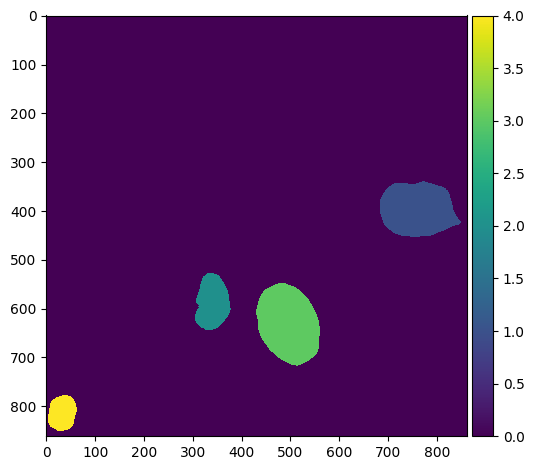

Cell:  0
Cell:  1
Cell:  2


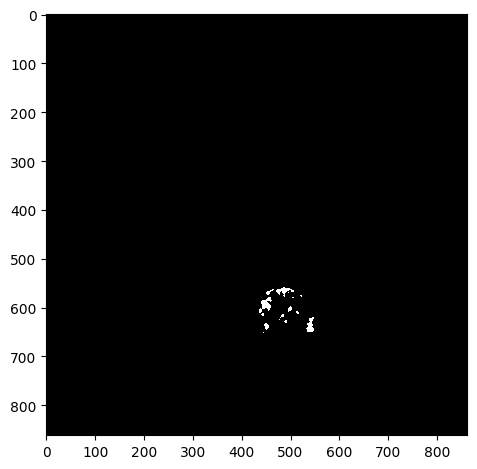

Cell:  3
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_01                    12    40834.0     9109.0   

   Inclusion_Area  Overlap_Area  
0          1404.0         242.0  
1K_PFF_HTRA1_Hoechst_20x_02.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


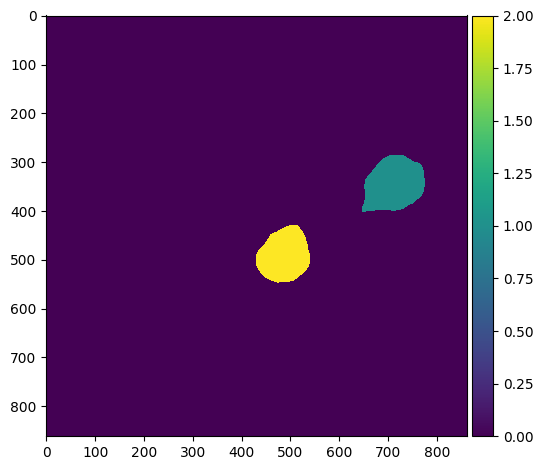

Cell:  0


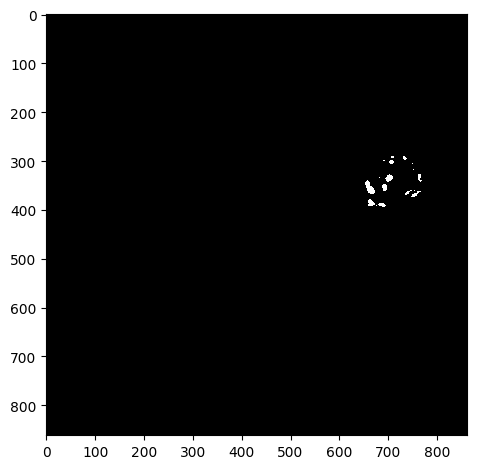

Cell:  1


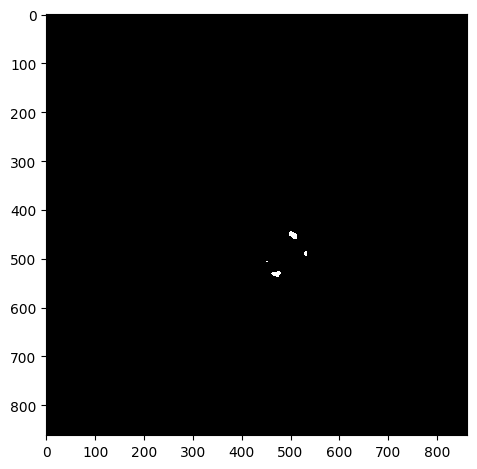

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_02                    15    21252.0     4029.0   

   Inclusion_Area  Overlap_Area  
0          1649.0         224.0  
1K_PFF_HTRA1_Hoechst_20x_03.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


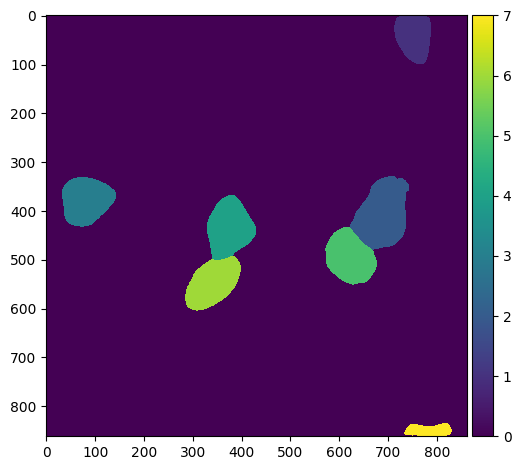

Cell:  0
Cell:  1


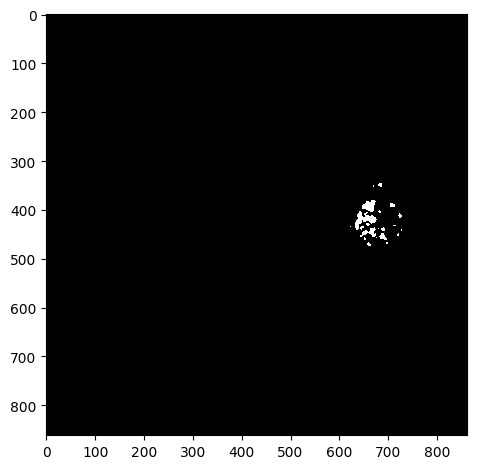

Cell:  2


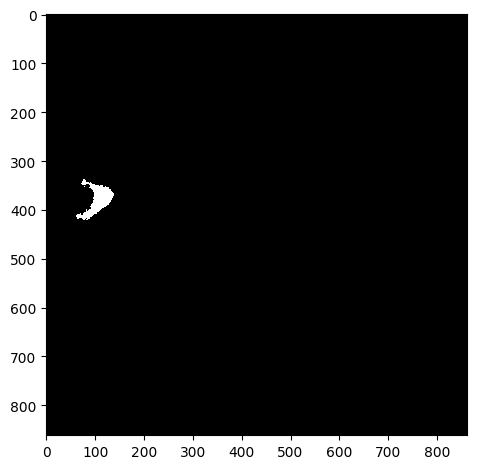

Cell:  3


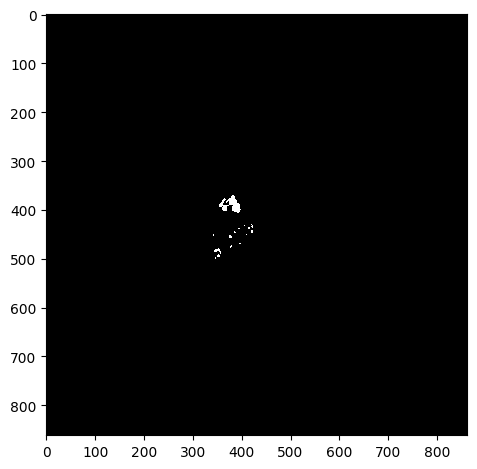

Cell:  4


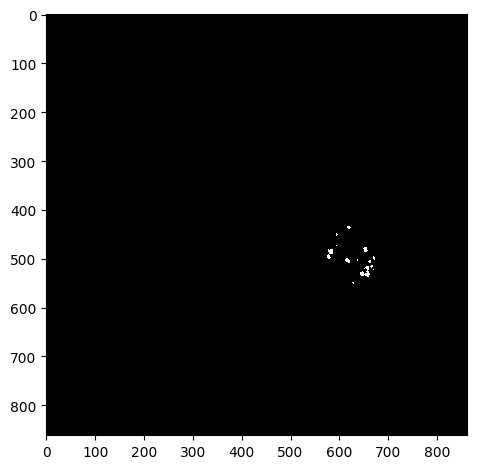

Cell:  5


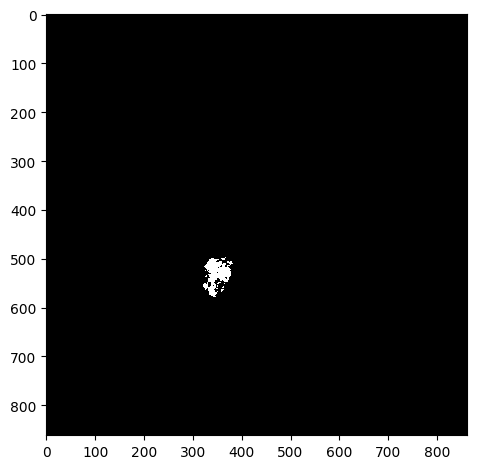

Cell:  6
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_03                    44    56054.0     2708.0   

   Inclusion_Area  Overlap_Area  
0          8790.0         396.0  
1K_PFF_HTRA1_Hoechst_20x_04.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


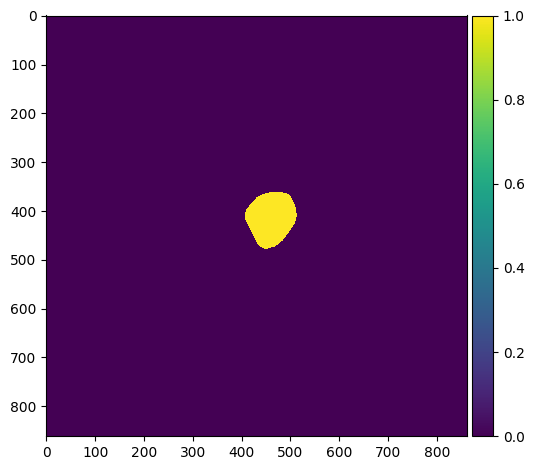

Cell:  0


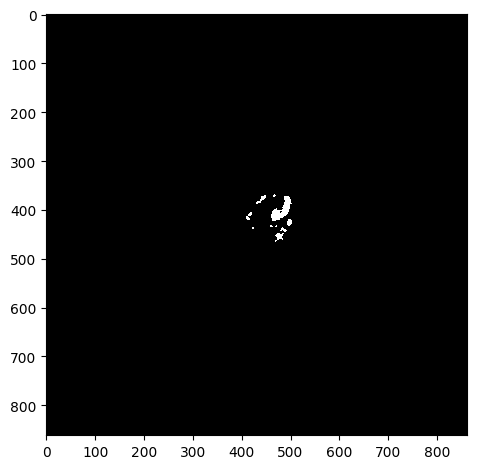

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_04                    11     8982.0      133.0   

   Inclusion_Area  Overlap_Area  
0          1674.0          56.0  
1K_PFF_HTRA1_Hoechst_20x_05.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


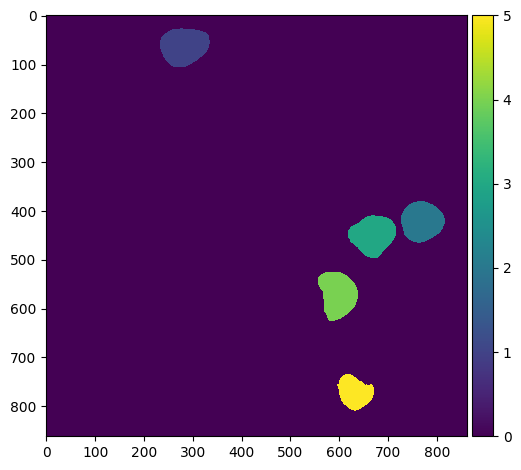

Cell:  0
Cell:  1
Cell:  2


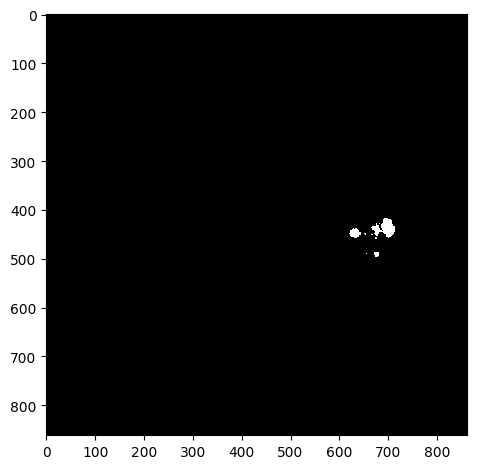

Cell:  3
Cell:  4
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_05                     4    28092.0       34.0   

   Inclusion_Area  Overlap_Area  
0          1477.0          13.0  
1K_PFF_HTRA1_Hoechst_20x_06.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


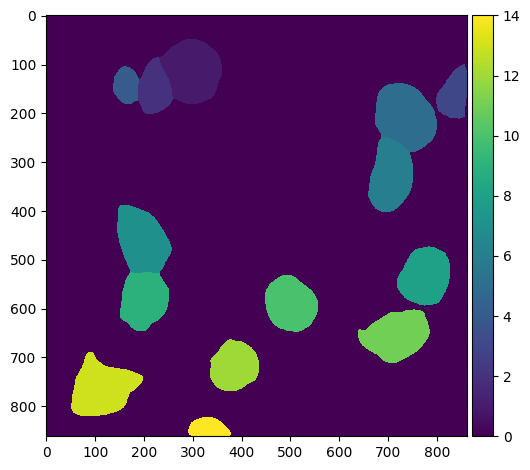

Cell:  0
Cell:  1


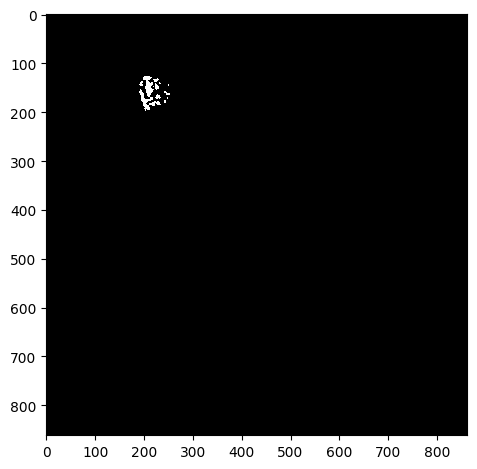

Cell:  2


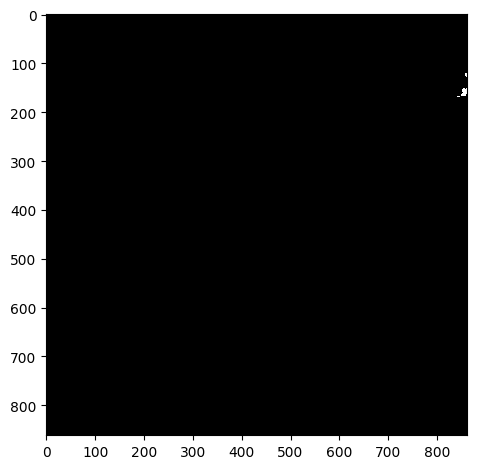

Cell:  3


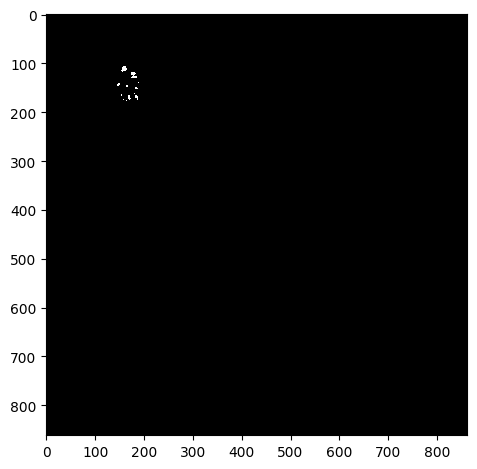

Cell:  4
Cell:  5


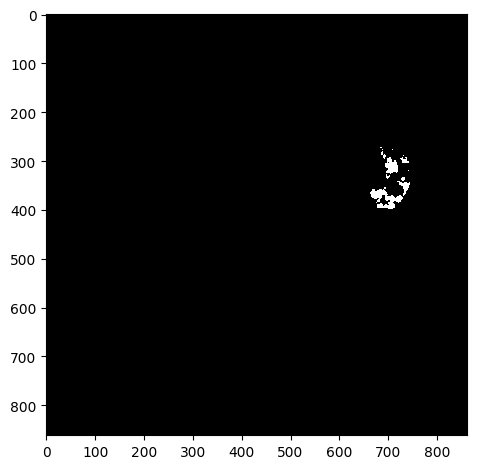

Cell:  6


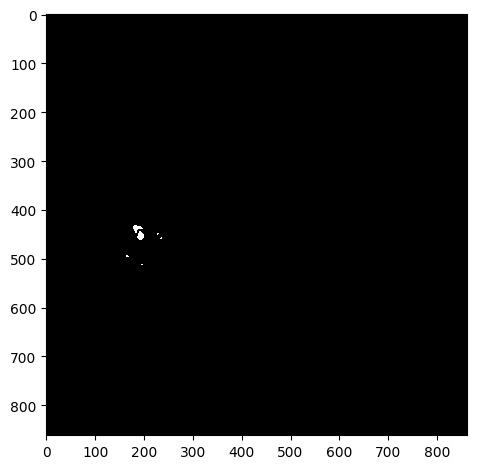

Cell:  7


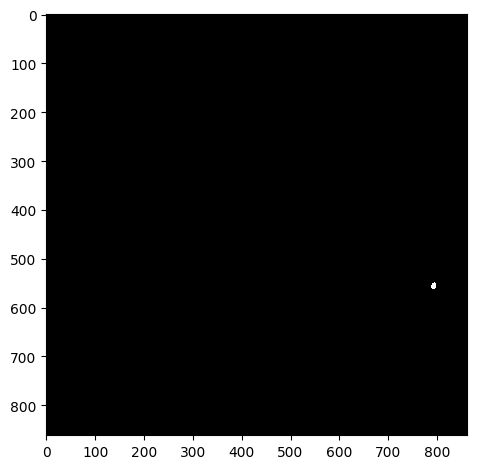

Cell:  8
Cell:  9


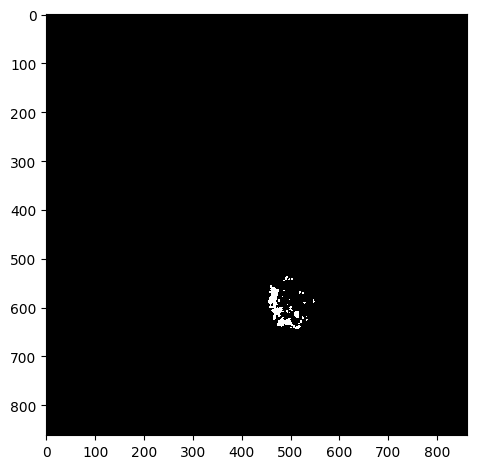

Cell:  10


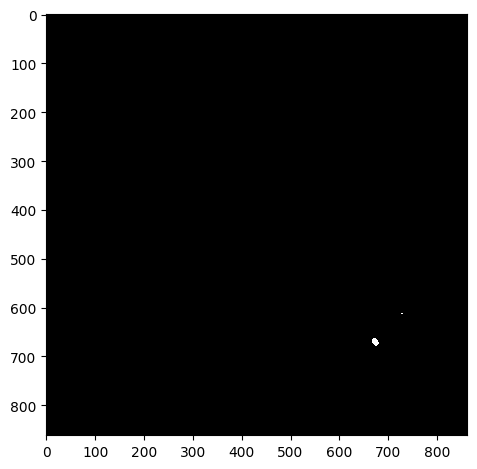

Cell:  11


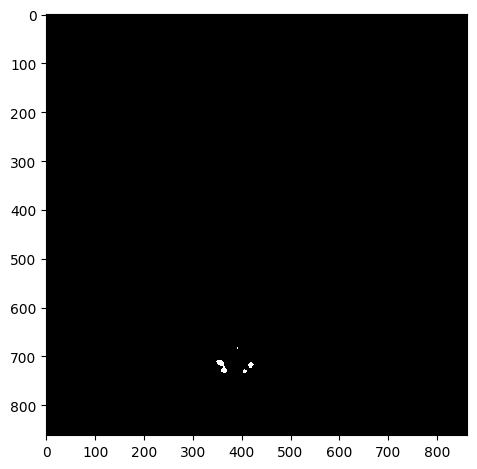

Cell:  12


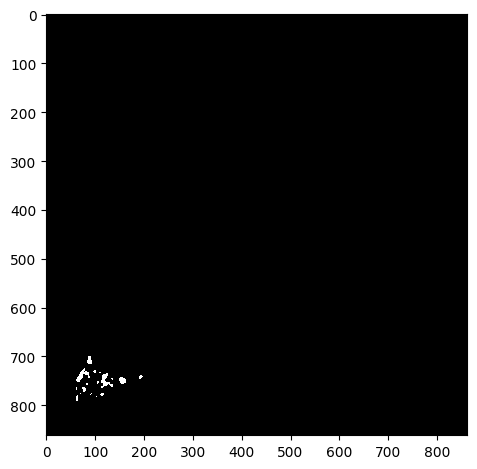

Cell:  13
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_06                    73   125645.0     8792.0   

   Inclusion_Area  Overlap_Area  
0          8953.0         689.0  
1K_PFF_HTRA1_Hoechst_20x_07.czi


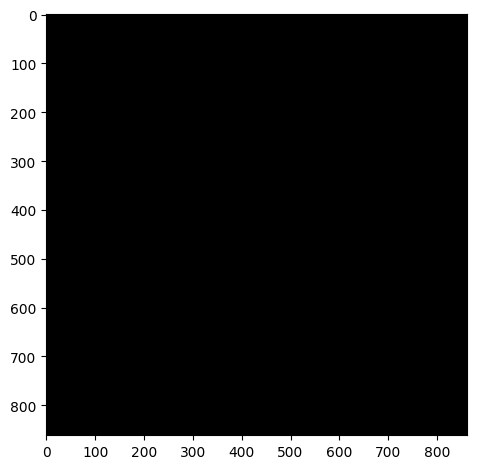

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_07                   0.0        0.0        0.0   

   Inclusion_Area  Overlap_Area  
0             0.0           0.0  
1K_PFF_HTRA1_Hoechst_20x_08.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


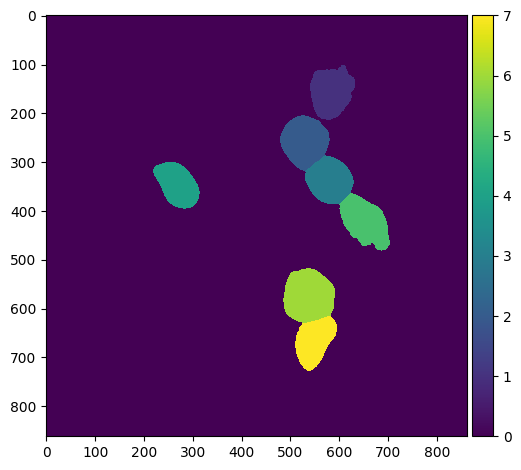

Cell:  0


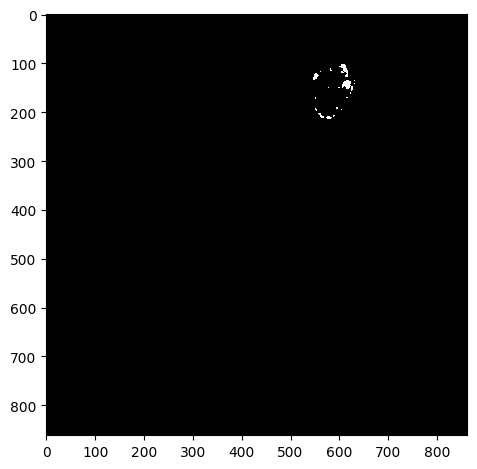

Cell:  1
Cell:  2
Cell:  3
Cell:  4
Cell:  5


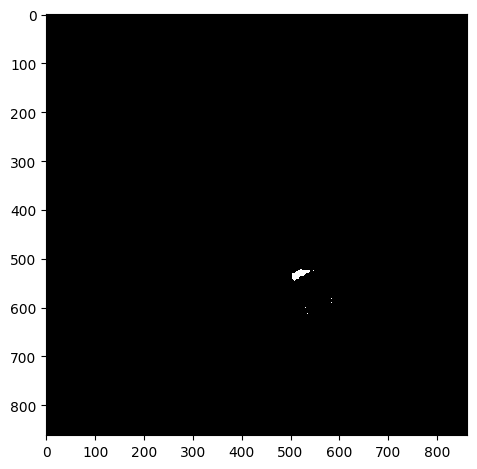

Cell:  6
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_08                    14    52901.0     3235.0   

   Inclusion_Area  Overlap_Area  
0          1238.0         186.0  
1K_PFF_HTRA1_Hoechst_20x_09.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


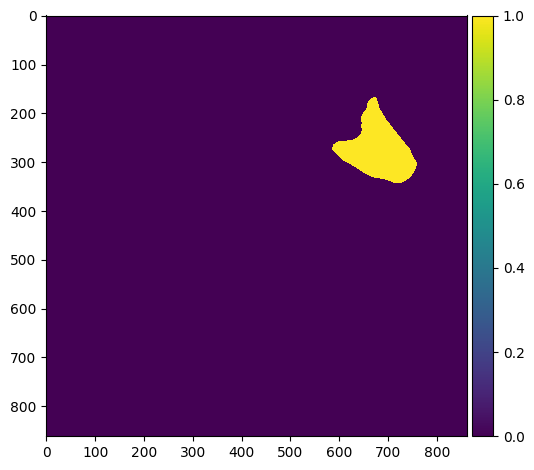

Cell:  0


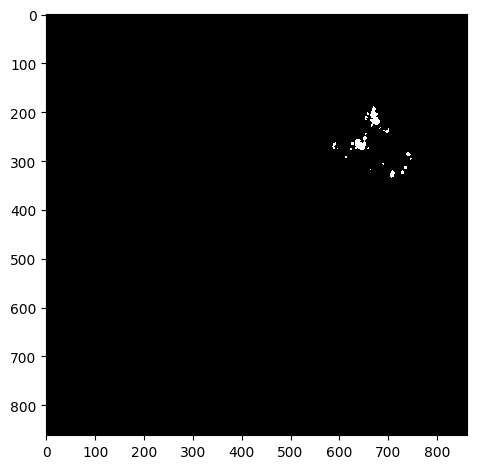

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_09                    16    15177.0      478.0   

   Inclusion_Area  Overlap_Area  
0          1415.0           3.0  
1K_PFF_HTRA1_Hoechst_20x_10.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


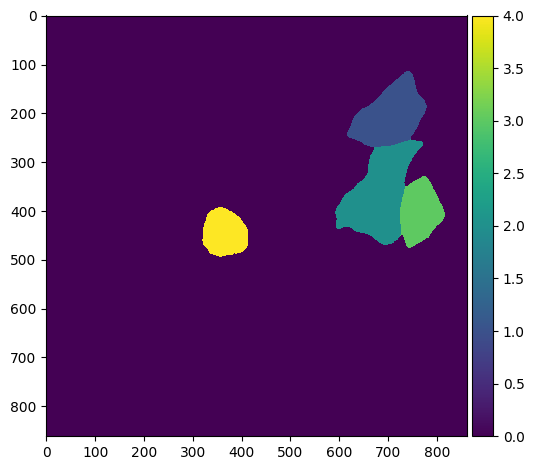

Cell:  0
Cell:  1


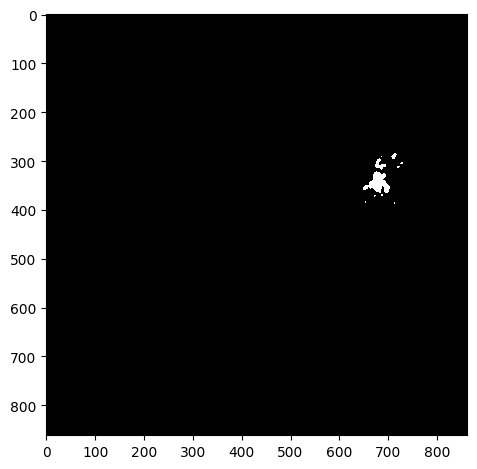

Cell:  2


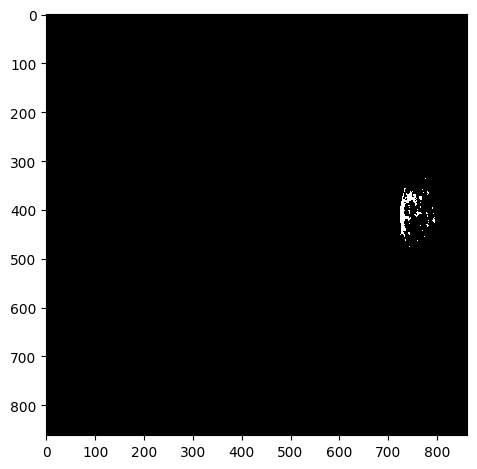

Cell:  3


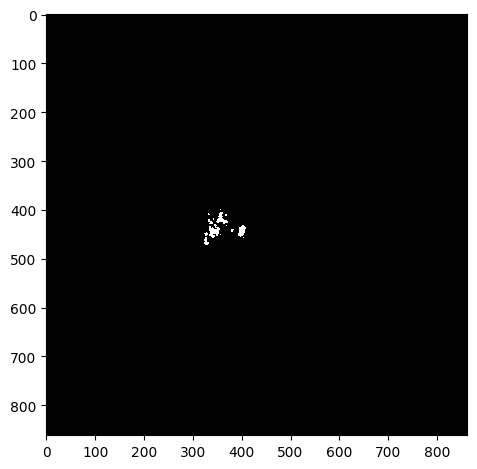

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_10                    25    52011.0     7206.0   

   Inclusion_Area  Overlap_Area  
0          4212.0         971.0  
1K_PFF_no_HTRA1_Hoechst_20x_01.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


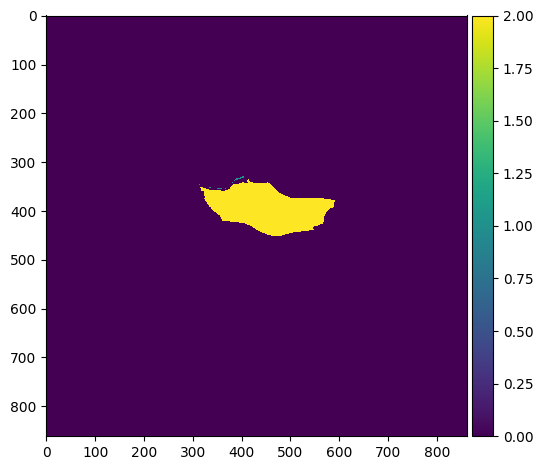

Cell:  1


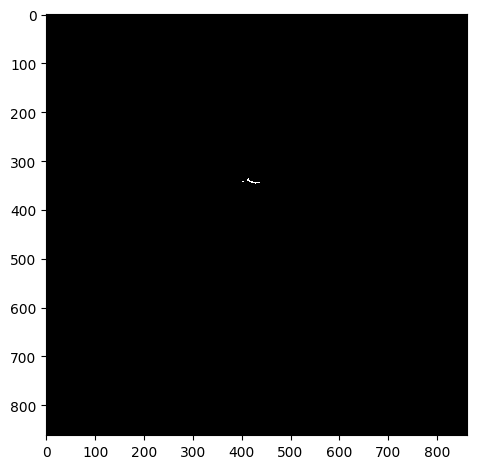

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_01                     2    18569.0      491.0   

   Inclusion_Area  Overlap_Area  
0           109.0          45.0  
1K_PFF_no_HTRA1_Hoechst_20x_02.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


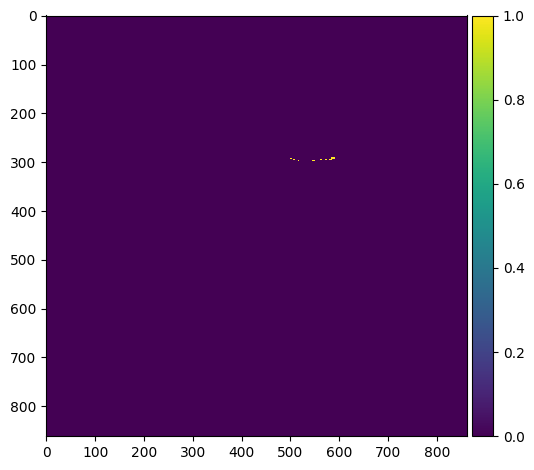

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_02                   0.0        0.0        0.0   

   Inclusion_Area  Overlap_Area  
0             0.0           0.0  
1K_PFF_no_HTRA1_Hoechst_20x_03.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


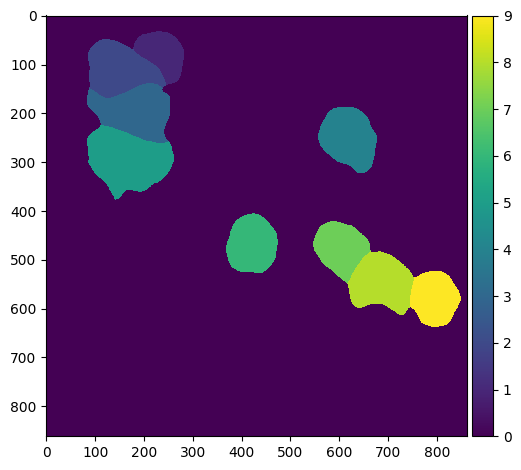

Cell:  0
Cell:  1
Cell:  2


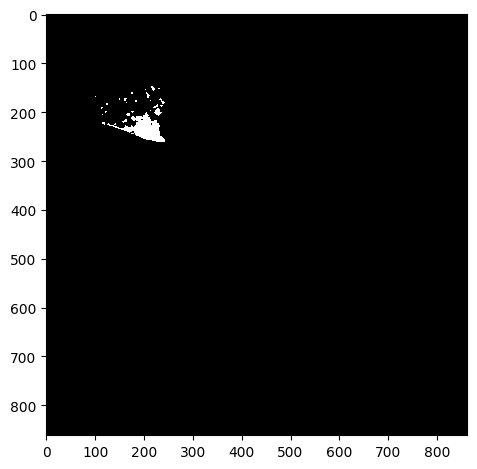

Cell:  3


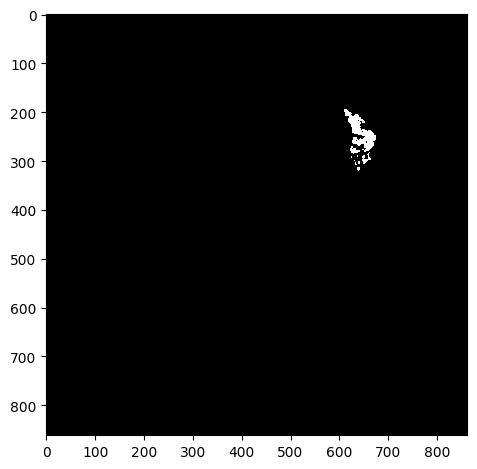

Cell:  4


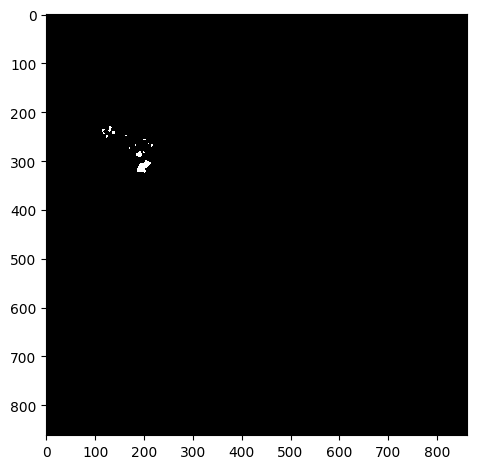

Cell:  5
Cell:  6
Cell:  7
Cell:  8


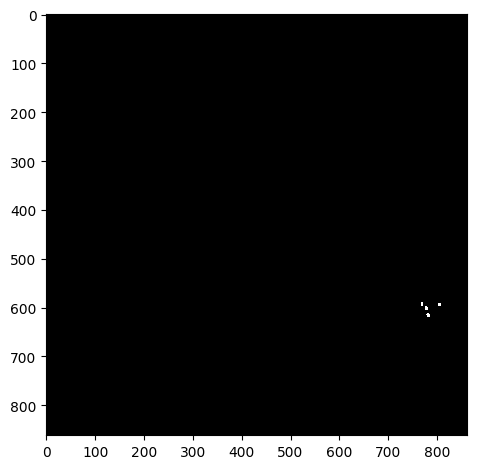

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_03                    36   104215.0    46512.0   

   Inclusion_Area  Overlap_Area  
0          6802.0        3071.0  
1K_PFF_no_HTRA1_Hoechst_20x_04.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


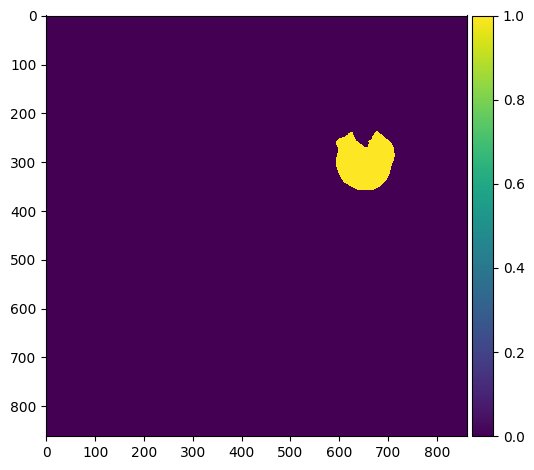

Cell:  0


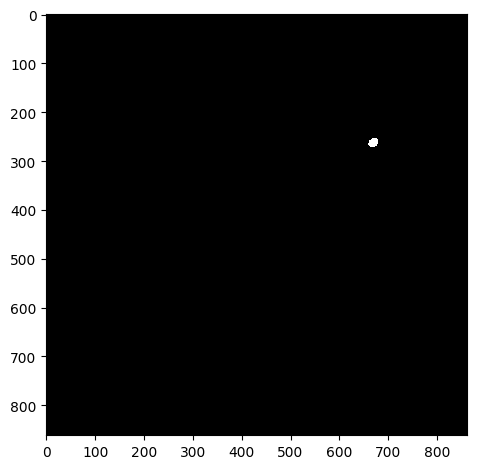

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_04                     1    10950.0     4933.0   

   Inclusion_Area  Overlap_Area  
0           304.0         239.0  
1K_PFF_no_HTRA1_Hoechst_20x_05.czi


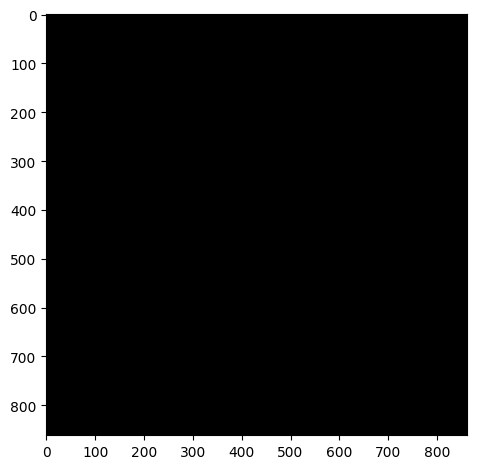

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_05                   0.0        0.0        0.0   

   Inclusion_Area  Overlap_Area  
0             0.0           0.0  
1K_PFF_no_HTRA1_Hoechst_20x_06.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


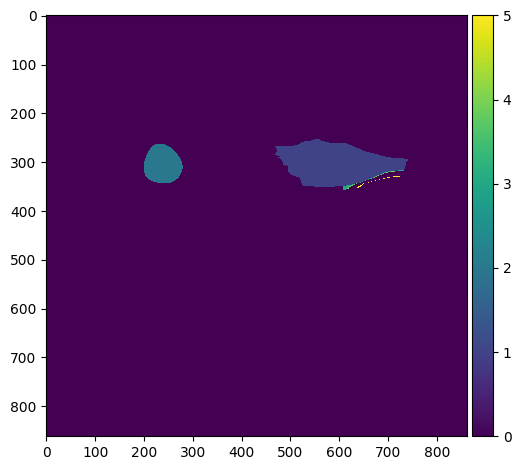

Cell:  0


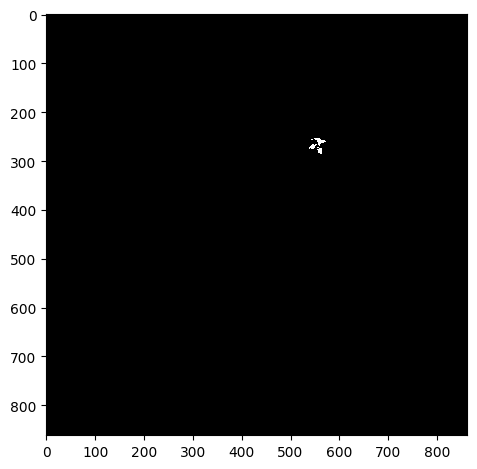

Cell:  1
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_06                     3    21859.0     9614.0   

   Inclusion_Area  Overlap_Area  
0           410.0         312.0  
1K_PFF_no_HTRA1_Hoechst_20x_07.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


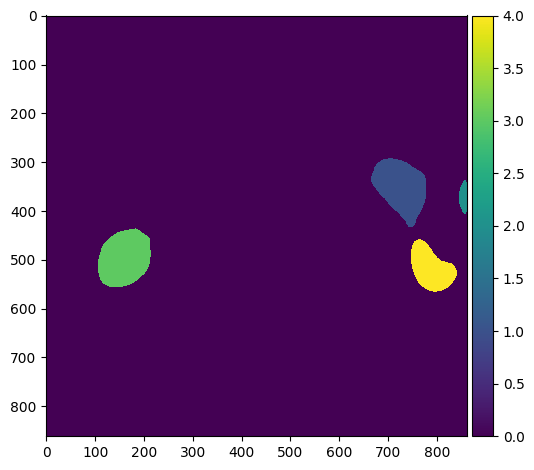

Cell:  0


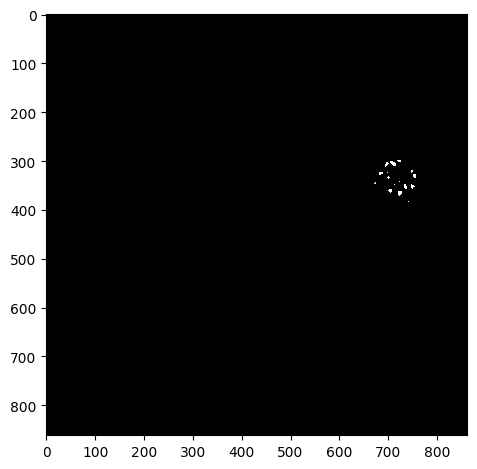

Cell:  1
Cell:  2
Cell:  3
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_07                    11    27670.0      162.0   

   Inclusion_Area  Overlap_Area  
0           499.0             0  
1K_PFF_no_HTRA1_Hoechst_20x_08.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


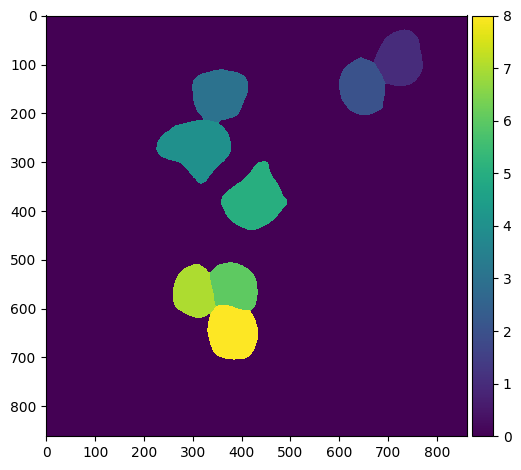

Cell:  0
Cell:  1
Cell:  2
Cell:  3


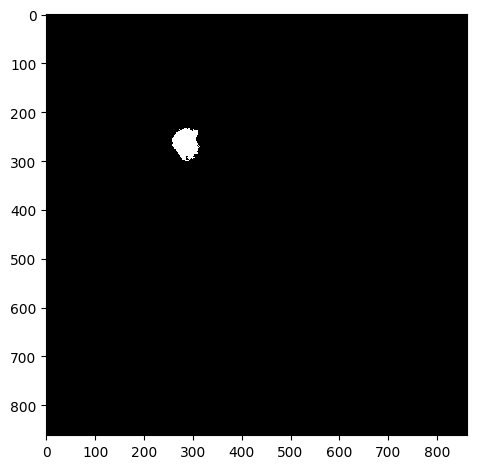

Cell:  4


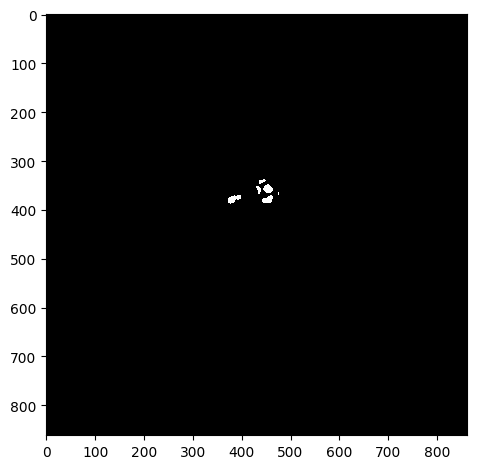

Cell:  5


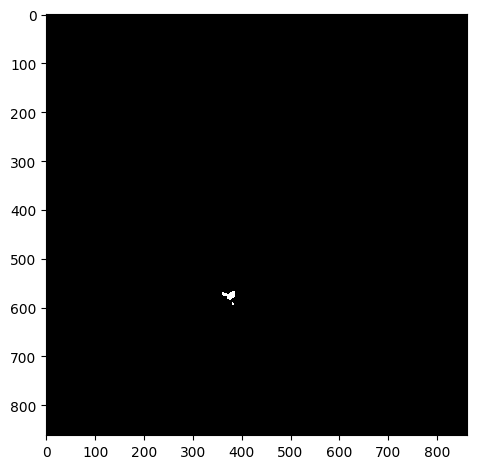

Cell:  6
Cell:  7


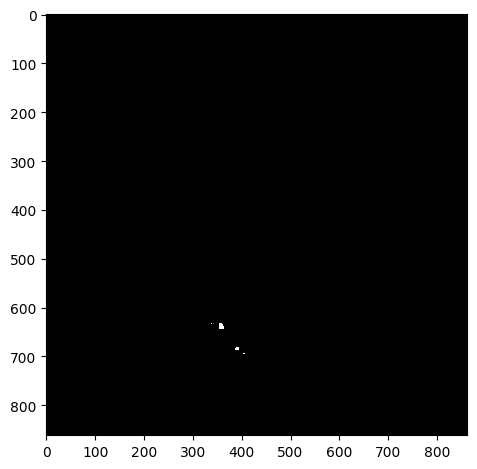

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_08                    12    76589.0       31.0   

   Inclusion_Area  Overlap_Area  
0          4139.0             0  
1K_PFF_no_HTRA1_Hoechst_20x_09.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


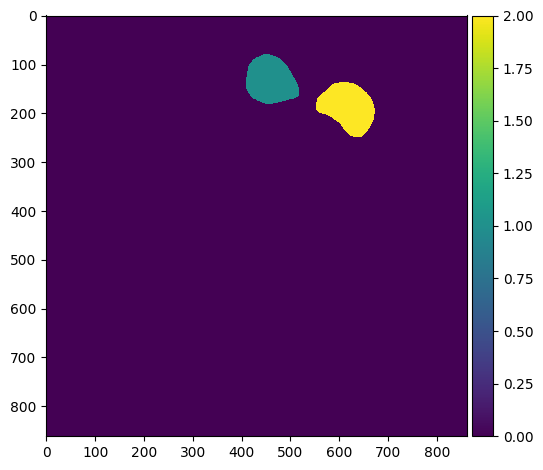

Cell:  0


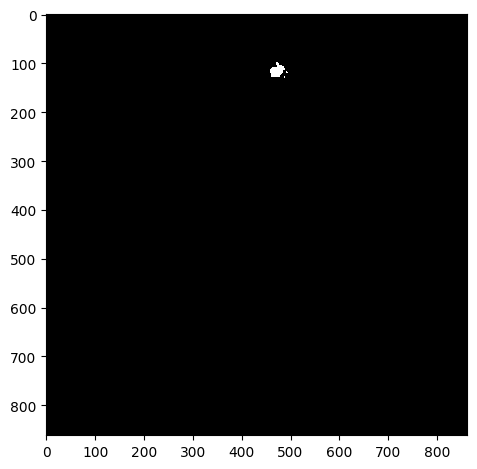

Cell:  1


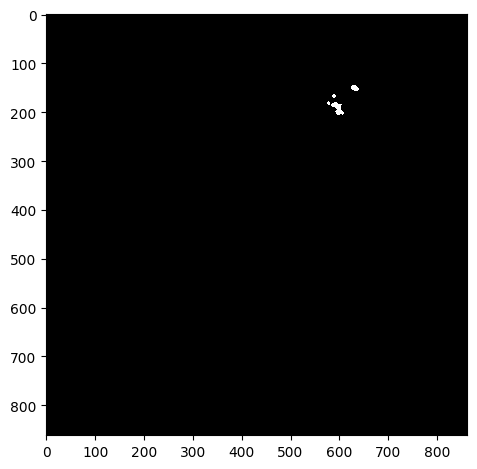

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_09                     7    17463.0     7180.0   

   Inclusion_Area  Overlap_Area  
0          1214.0         942.0  
1K_PFF_no_HTRA1_Hoechst_20x_10.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


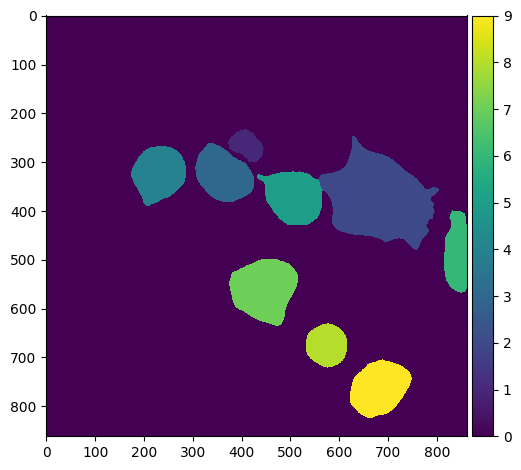

Cell:  0
Cell:  1
Cell:  2
Cell:  3
Cell:  4


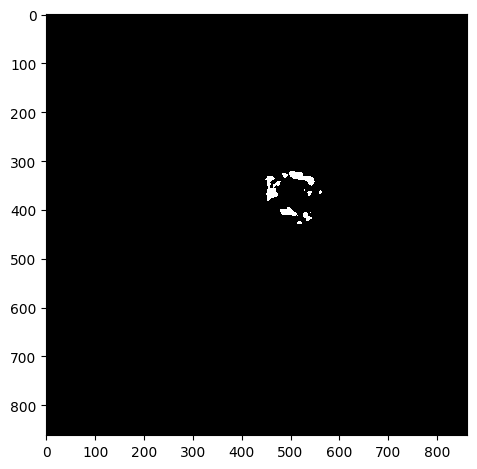

Cell:  5
Cell:  6


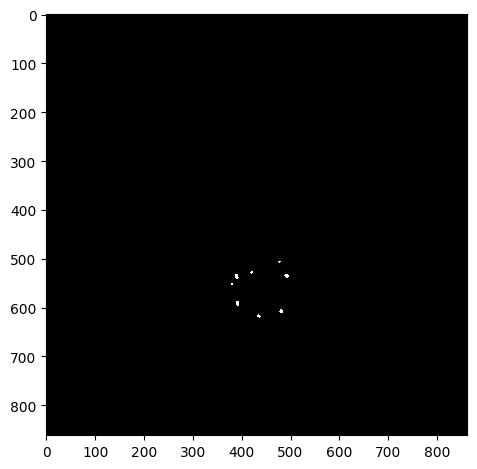

Cell:  7


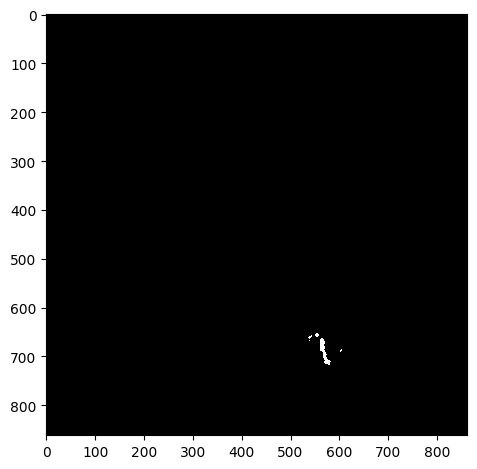

Cell:  8
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_no_HTRA1_Hoechst_20x_10                    20   103857.0     5758.0   

   Inclusion_Area  Overlap_Area  
0          3232.0         569.0  
wt_PFF_HTRA1_Hoechst_20x_01.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


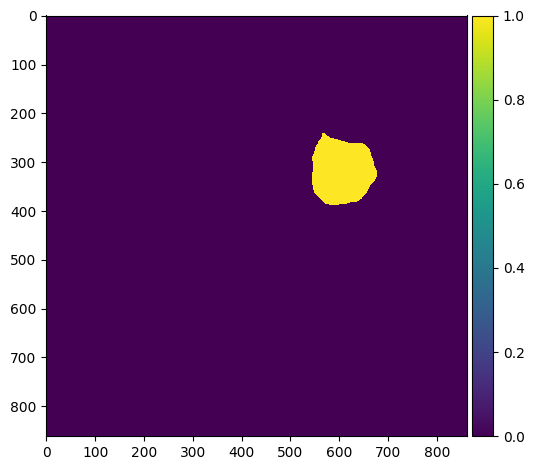

Cell:  0


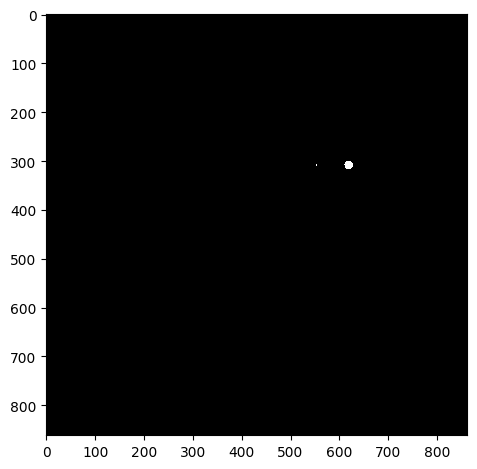

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_01                     1    14776.0       84.0   

   Inclusion_Area  Overlap_Area  
0           228.0          30.0  
wt_PFF_HTRA1_Hoechst_20x_02.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


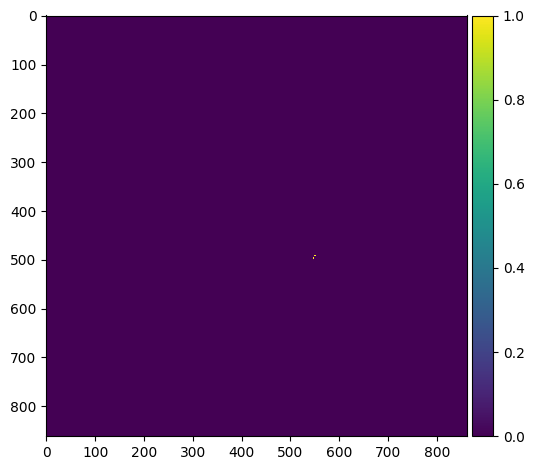

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_02                   0.0        0.0        0.0   

   Inclusion_Area  Overlap_Area  
0             0.0           0.0  
wt_PFF_HTRA1_Hoechst_20x_03.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


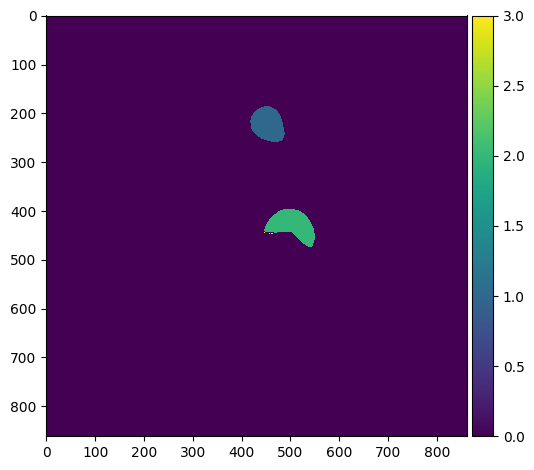

Cell:  0
Cell:  1
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_03                     0     8579.0          0   

   Inclusion_Area  Overlap_Area  
0               0             0  
wt_PFF_HTRA1_Hoechst_20x_04.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


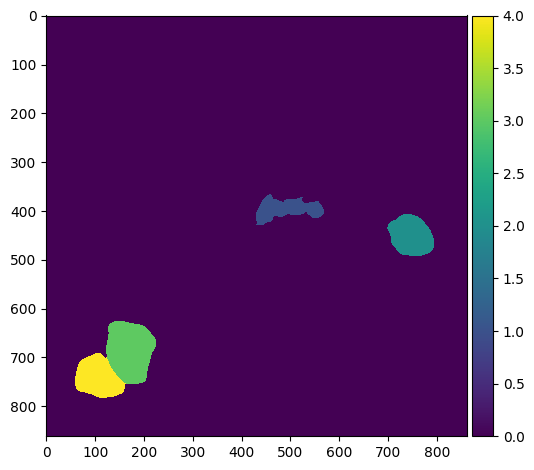

Cell:  0


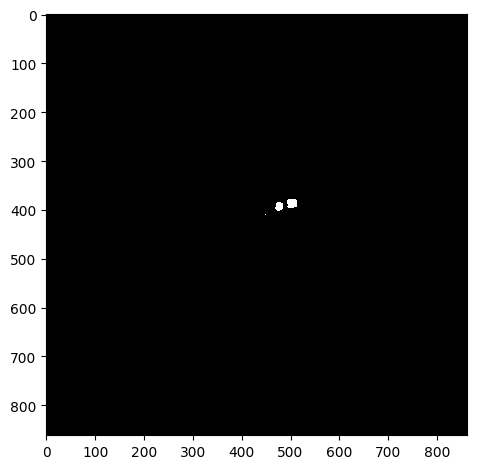

Cell:  1
Cell:  2
Cell:  3
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_04                     2    27796.0     5866.0   

   Inclusion_Area  Overlap_Area  
0           610.0         578.0  
wt_PFF_HTRA1_Hoechst_20x_05.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


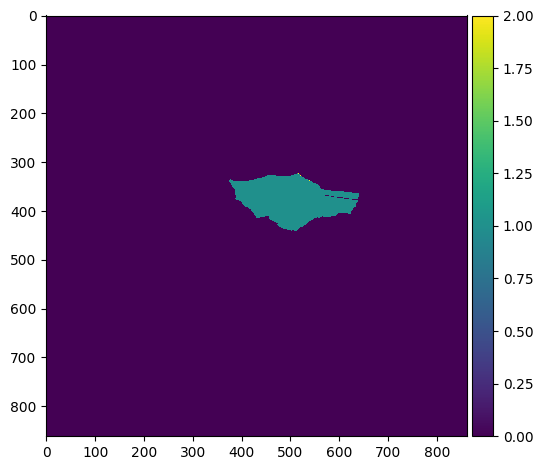

Cell:  0


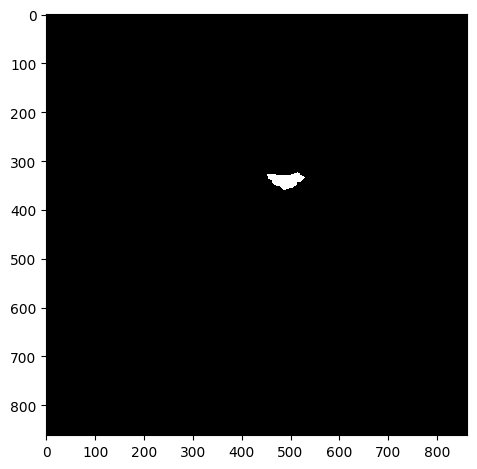

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_05                     1    18260.0      434.0   

   Inclusion_Area  Overlap_Area  
0          1649.0             0  
wt_PFF_HTRA1_Hoechst_20x_06.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


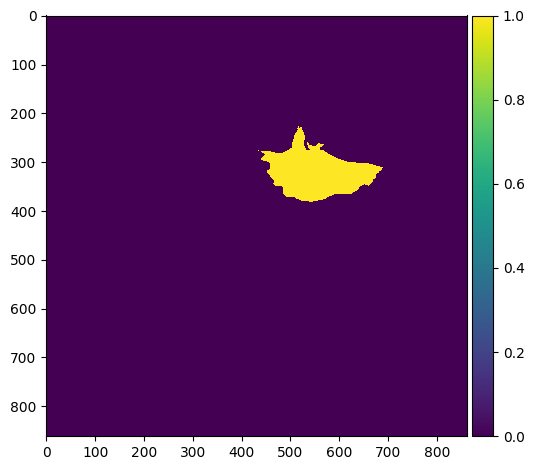

Cell:  0


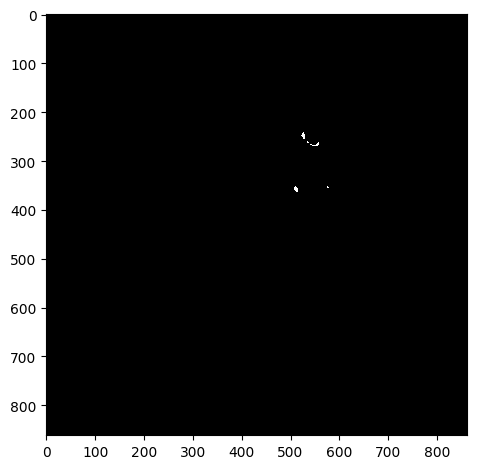

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_06                     4    18623.0      104.0   

   Inclusion_Area  Overlap_Area  
0           207.0             0  
wt_PFF_HTRA1_Hoechst_20x_07.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


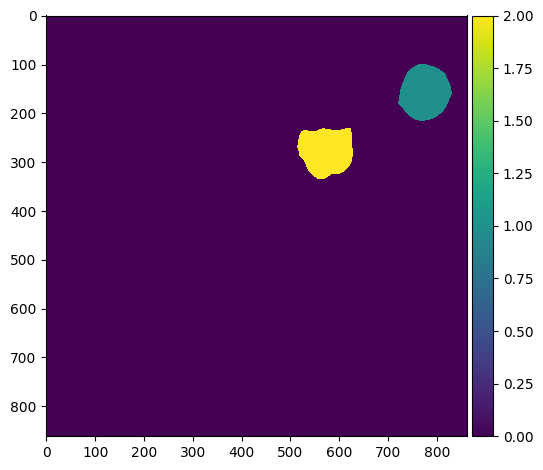

Cell:  0
Cell:  1
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_07                     0    19033.0     1344.0   

   Inclusion_Area  Overlap_Area  
0               0             0  
wt_PFF_HTRA1_Hoechst_20x_08.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


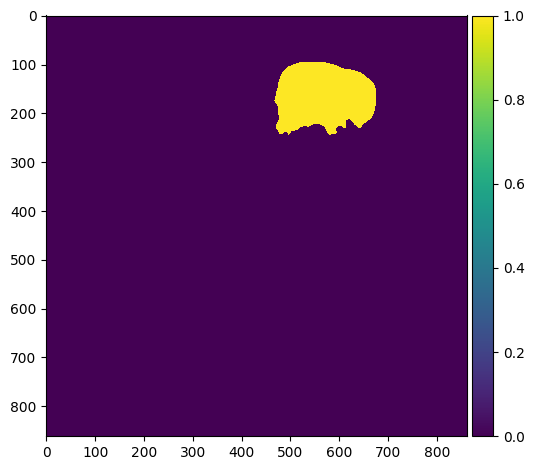

Cell:  0


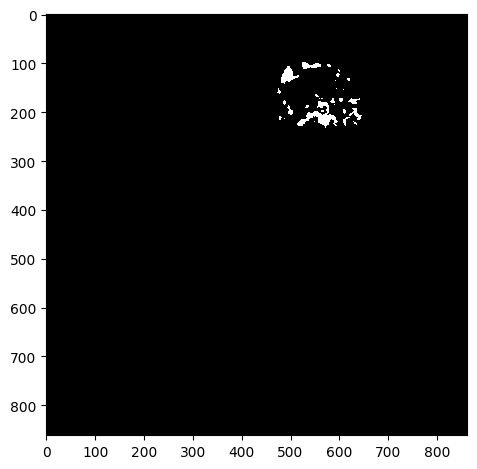

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_08                    21    24353.0     3196.0   

   Inclusion_Area  Overlap_Area  
0          3764.0         983.0  
wt_PFF_HTRA1_Hoechst_20x_09.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


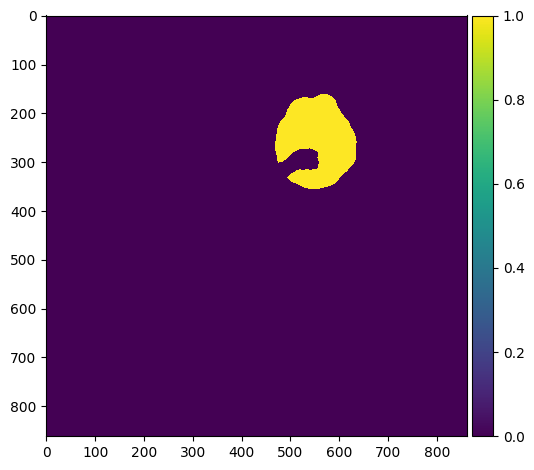

Cell:  0
                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_09                     0    21839.0     5112.0   

   Inclusion_Area  Overlap_Area  
0               0             0  
wt_PFF_HTRA1_Hoechst_20x_10.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


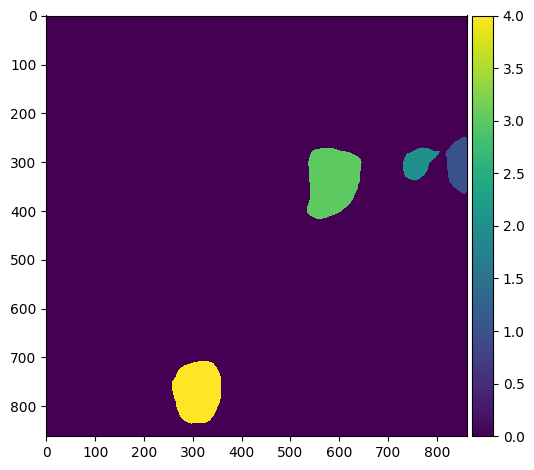

Cell:  0
Cell:  1


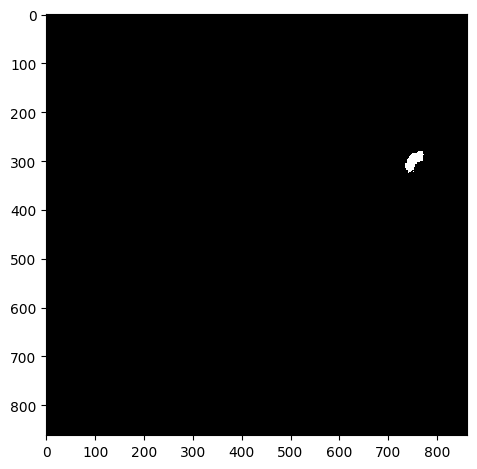

Cell:  2


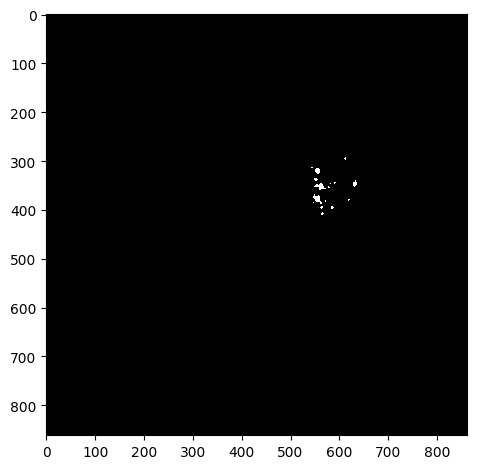

Cell:  3


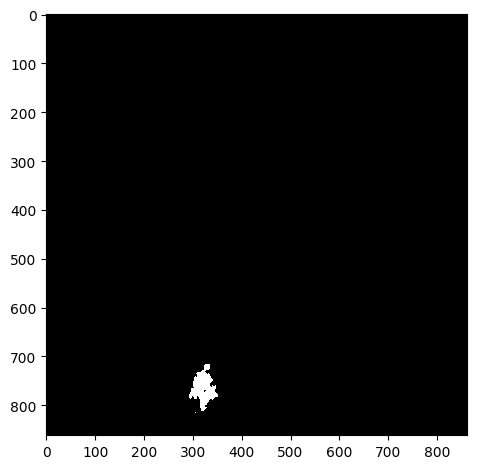

                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_HTRA1_Hoechst_20x_10                    13    30318.0      439.0   

   Inclusion_Area  Overlap_Area  
0          4390.0          19.0  
wt_PFF_no_HTRA1_Hoechst_20x_01.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


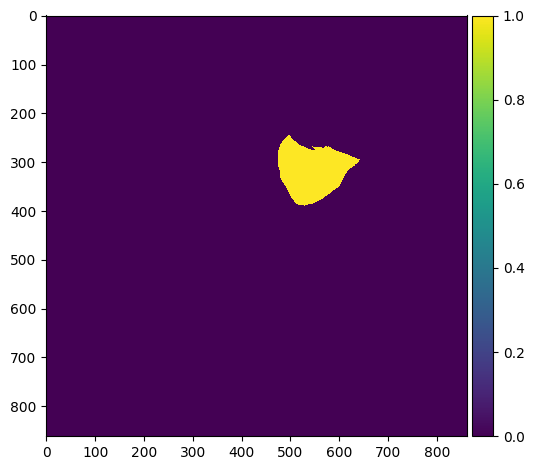

Cell:  0
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_01                     0    14372.0    12182.0   

   Inclusion_Area  Overlap_Area  
0               0             0  
wt_PFF_no_HTRA1_Hoechst_20x_02.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


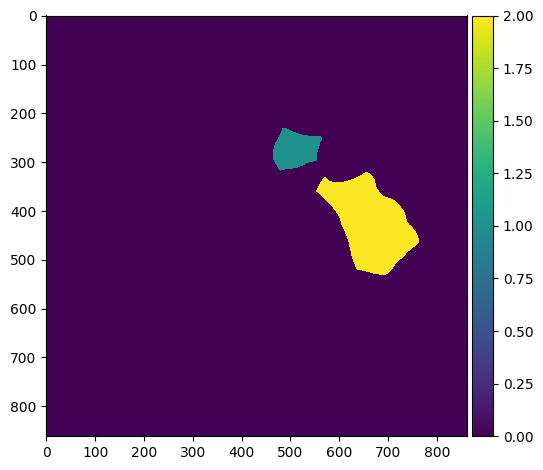

Cell:  0
Cell:  1
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_02                     0    30308.0    11216.0   

   Inclusion_Area  Overlap_Area  
0               0             0  
wt_PFF_no_HTRA1_Hoechst_20x_03.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


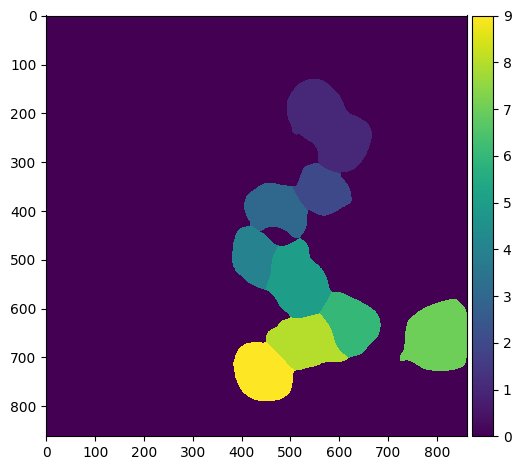

Cell:  0


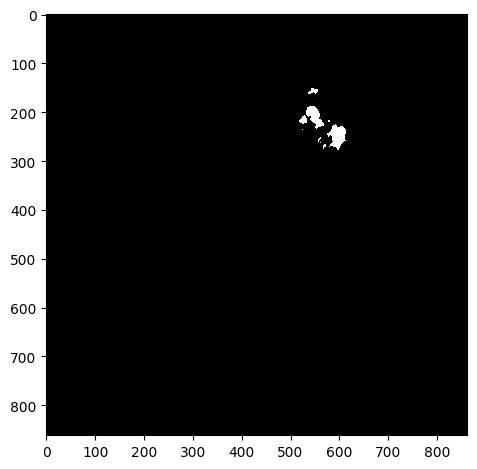

Cell:  1
Cell:  2


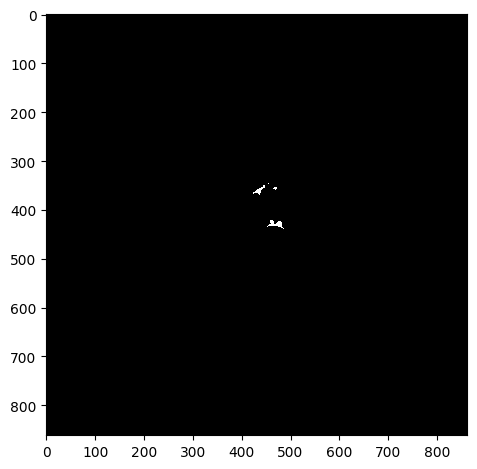

Cell:  3


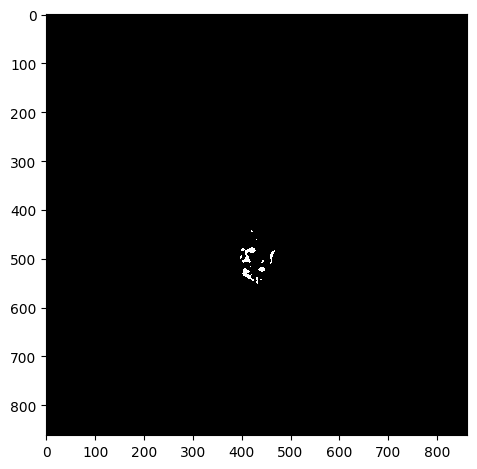

Cell:  4


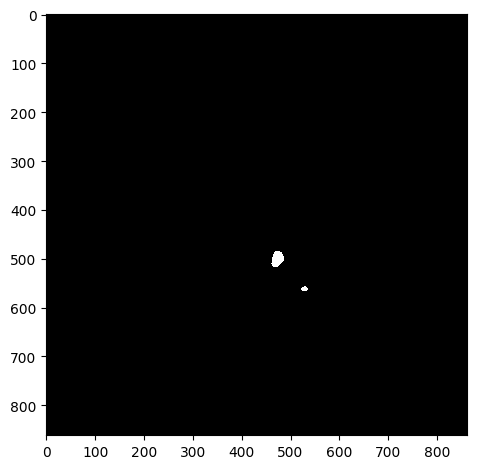

Cell:  5
Cell:  6
Cell:  7


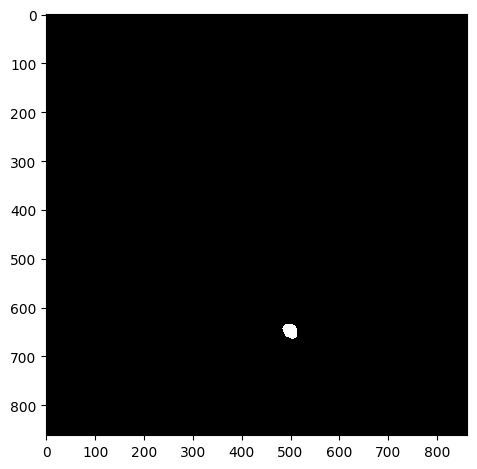

Cell:  8
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_03                    22   113716.0      772.0   

   Inclusion_Area  Overlap_Area  
0          5506.0             0  
wt_PFF_no_HTRA1_Hoechst_20x_04.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


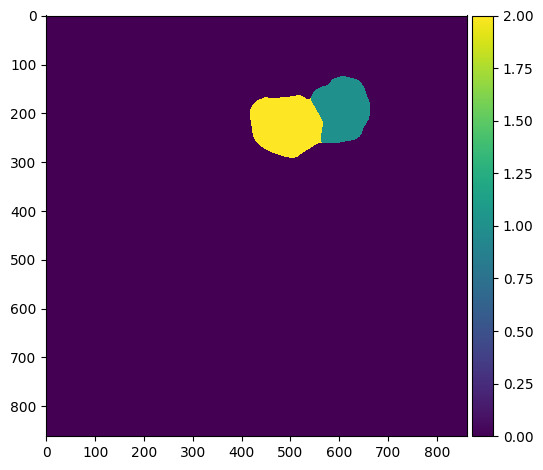

Cell:  0


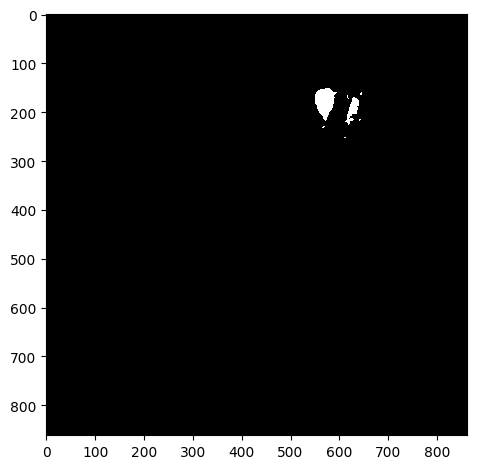

Cell:  1
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_04                     6    27396.0    12841.0   

   Inclusion_Area  Overlap_Area  
0          2655.0        1837.0  
wt_PFF_no_HTRA1_Hoechst_20x_05.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


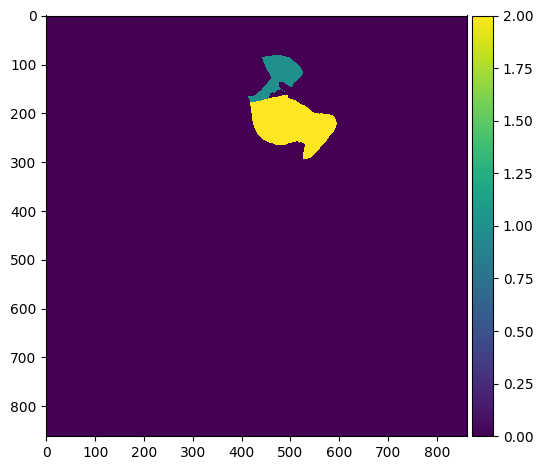

Cell:  0


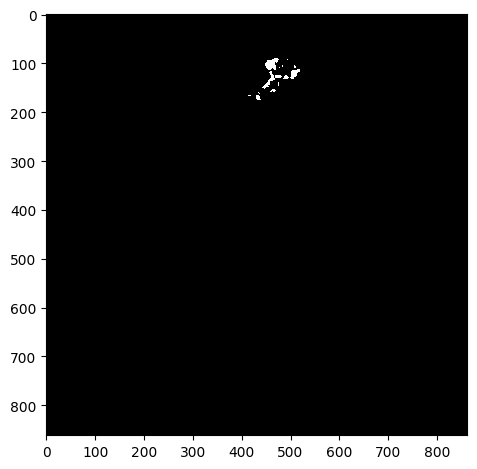

Cell:  1


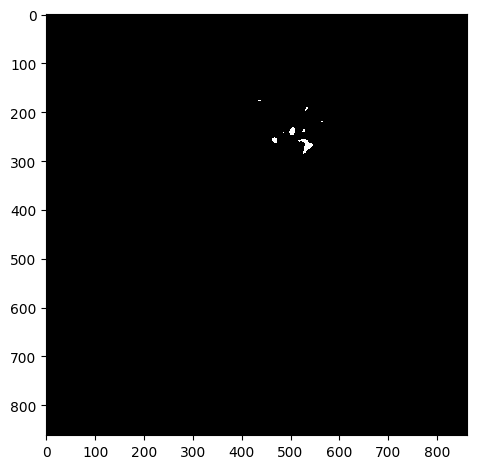

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_05                    13    18701.0    14375.0   

   Inclusion_Area  Overlap_Area  
0          1962.0        1468.0  
wt_PFF_no_HTRA1_Hoechst_20x_06.czi


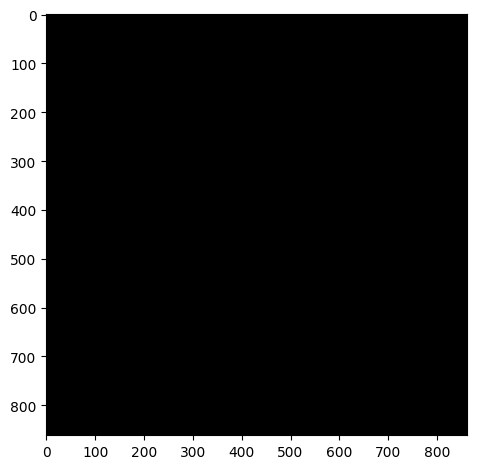

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_06                   0.0        0.0        0.0   

   Inclusion_Area  Overlap_Area  
0             0.0           0.0  
wt_PFF_no_HTRA1_Hoechst_20x_07.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


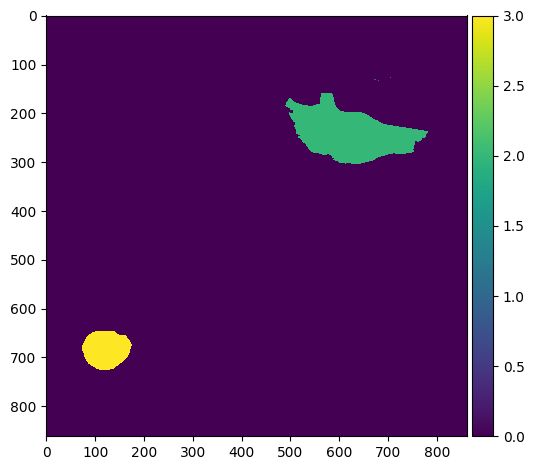

Cell:  5


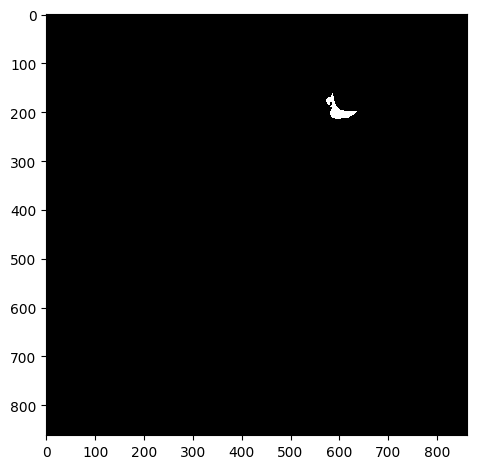

Cell:  6
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_07                     1    28721.0     9034.0   

   Inclusion_Area  Overlap_Area  
0          1135.0        1100.0  
wt_PFF_no_HTRA1_Hoechst_20x_08.czi


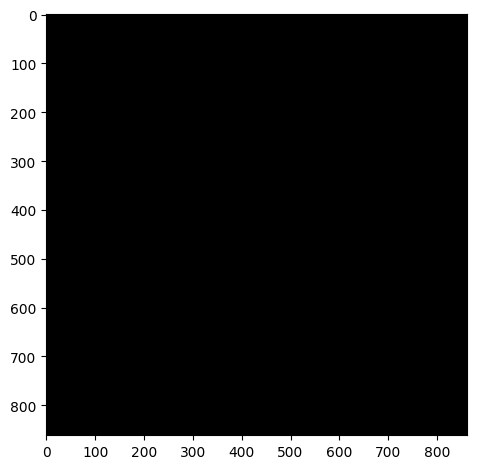

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_08                   0.0        0.0        0.0   

   Inclusion_Area  Overlap_Area  
0             0.0           0.0  
wt_PFF_no_HTRA1_Hoechst_20x_09.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


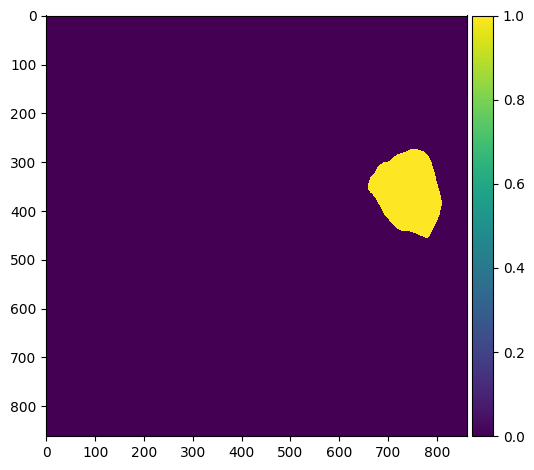

Cell:  0


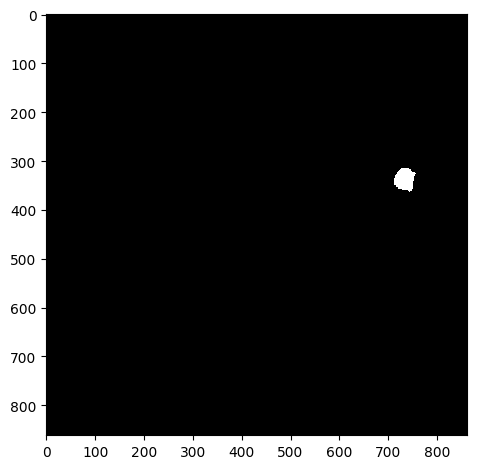

                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_09                     1    18878.0    11351.0   

   Inclusion_Area  Overlap_Area  
0          1579.0         835.0  
wt_PFF_no_HTRA1_Hoechst_20x_10.czi


c:\Users\yh1024\Documents\Yiming Huang\.venv\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


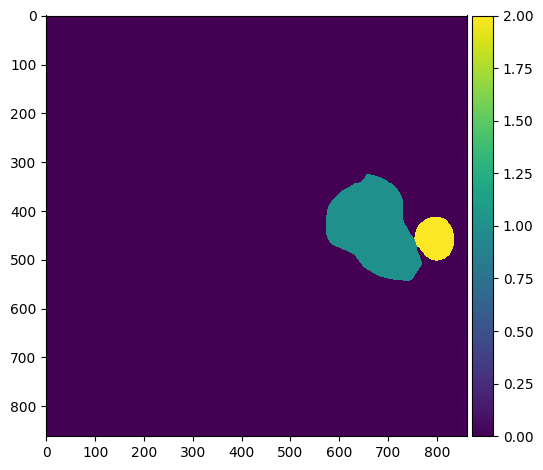

Cell:  0


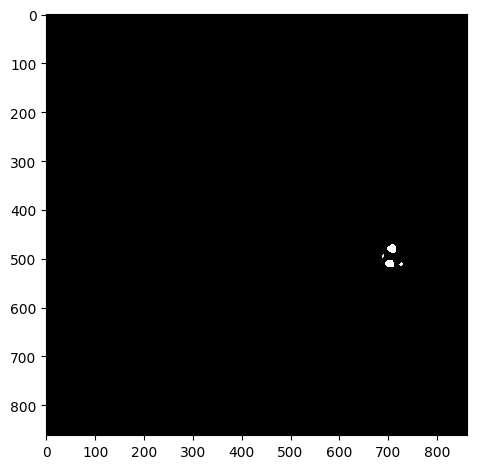

Cell:  1
                       File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  wt_PFF_no_HTRA1_Hoechst_20x_10                     4    33733.0          0   

   Inclusion_Area  Overlap_Area  
0           560.0             0  
[                    File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_01                    12    40834.0     9109.0   

   Inclusion_Area  Overlap_Area  
0          1404.0         242.0  ,                     File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_02                    15    21252.0     4029.0   

   Inclusion_Area  Overlap_Area  
0          1649.0         224.0  ,                     File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  1K_PFF_HTRA1_Hoechst_20x_03                    44    56054.0     2708.0   

   Inclusion_Area  Overlap_Area  
0          8790.0         396.0  ,                     File_Name:  Number_of_Inclusions  Cell_Area  HTRA_Area  \
0  

In [23]:
def main(image_folder):
    # analyze_all_images(image_folder)
    analyze_all_images_by_cell(image_folder)
    

if __name__ == "__main__":
    image_folder = '110724_PFF_HTRA1' # threshold = 0.95
    
    main(image_folder)
